In [1]:
# Import libraries
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
# Define a transform
transform = transforms.Compose( [ transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))] )

In [3]:
# Load train data
trainset = datasets.MNIST(root="../Data/", download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [4]:
# Load validation data
# train is false for validation data
validationset = datasets.MNIST(root="../Data/", download=True, train=False, transform=transform)
validationloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [5]:
# Network class
class Classifier(nn.Module):

    # Constructor
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)
    
    # Feed Forward
    def forward(self, x):

        # Flatten
        x = x.view(x.shape[0], -1)

        # With dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # No dropout in output layer.
        x = F.log_softmax(self.fc4(x))

        return x

In [6]:
# Model
model = Classifier()
# Loss function
criterion = nn.NLLLoss()
# Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [7]:
# Training and validation.
epochs = 30

train_losses, validation_losses = [], []
for epoch in range(epochs):

    # Training
    for images, labels in trainloader:

        # Forward pass
        logps = model(images)

        # Compute loss
        loss = criterion(logps, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    else:

        # Validation
        accuracy = 0

        # Turn off gradients
        with torch.no_grad():

            # We turn model into evaluation mode
            # So that no dropout in validation time
            model.eval()
            for images, labels in validationloader:

                logps = model(images)
                validation_loss = criterion(logps, labels)

                ps = torch.exp(logps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
            
        # We turn model into train mode
        model.train()
        
        train_losses.append(loss)
        validation_losses.append(validation_loss)

        print(f"Epoch: {epoch+1}/{epochs}:\n",
            f"Training loss: {loss}\n",
            f"Validation loss: {validation_loss}\n",
            f"Accuracy: {accuracy/len(validationloader)}")

Epoch: 1/30:
 Training loss: 2.2081007957458496
 Validation loss: 2.2042367458343506
 Accuracy: 0.2513492703437805
Epoch: 2/30:
 Training loss: 1.7291412353515625
 Validation loss: 1.5812195539474487
 Accuracy: 0.6178538203239441
Epoch: 3/30:
 Training loss: 1.3595713376998901
 Validation loss: 0.8982909917831421
 Accuracy: 0.773870587348938
Epoch: 4/30:
 Training loss: 0.8594246506690979
 Validation loss: 0.949945330619812
 Accuracy: 0.8365204930305481
Epoch: 5/30:
 Training loss: 0.5265775322914124
 Validation loss: 0.33476030826568604
 Accuracy: 0.8651719093322754
Epoch: 6/30:
 Training loss: 0.32528576254844666
 Validation loss: 0.2887260913848877
 Accuracy: 0.8786147236824036
Epoch: 7/30:
 Training loss: 0.4925585389137268
 Validation loss: 0.3424314260482788
 Accuracy: 0.8879097700119019
Epoch: 8/30:
 Training loss: 0.27485746145248413
 Validation loss: 0.48273807764053345
 Accuracy: 0.8955889940261841
Epoch: 9/30:
 Training loss: 0.5474438667297363
 Validation loss: 0.3188866376

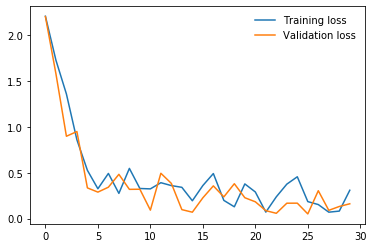

In [8]:
#Plotting cost curves
plt.plot(train_losses, label="Training loss")
plt.plot(validation_losses, label="Validation loss")
plt.legend(frameon=False)
plt.show()